<a href="https://colab.research.google.com/github/ombelote/Tensorflow-Practice/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Types if classification problems:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [45]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

X,y = make_circles(n_samples ,
                   noise= 0.03 ,
                   random_state = 42)

In [46]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [47]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [48]:
import pandas as pd
circles = pd.DataFrame({'X0' : X[ : , 0], "X1" : X[ :, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


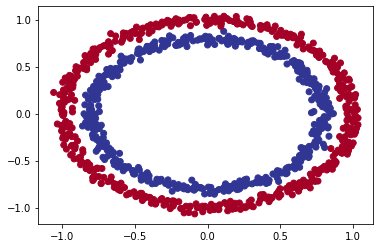

In [49]:
plt.scatter(X[ : , 0], X[ :, 1], c = y, cmap= plt.cm.RdYlBu)

# Input and Output shapes


In [50]:
X.shape, y.shape

((1000, 2), (1000,))

In [51]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [52]:
# X = tf.cast(X, dtype= 'float64')
# y = tf.cast(y, dtype= 'float64')
X[0,:],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling with tensorflow

1. Create the model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate


In [53]:
import tensorflow as tf
import keras

In [54]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [55]:
# lets try to improve our model
model_1.fit(X,y, epochs = 200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 940us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

###since we are working on binary classification our model is getting around 50 % accuracy as if it is guessing


In [56]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X, y, epochs=100, verbose = 0 )

In [57]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 882us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

# Improving our model

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs=100, verbose = 0 )

In [59]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 983us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [60]:
model_3.predict(X)

array([[0.4879332 ],
       [0.5588736 ],
       [0.562926  ],
       [0.570506  ],
       [0.4414098 ],
       [0.57388115],
       [0.5576488 ],
       [0.48246706],
       [0.47755563],
       [0.575023  ],
       [0.51484585],
       [0.53087837],
       [0.56437737],
       [0.45787275],
       [0.4505265 ],
       [0.46129704],
       [0.54055476],
       [0.46380702],
       [0.54797745],
       [0.5037532 ],
       [0.5063052 ],
       [0.58775383],
       [0.45902184],
       [0.49123392],
       [0.58321387],
       [0.5704231 ],
       [0.5523946 ],
       [0.46317378],
       [0.45773214],
       [0.45440915],
       [0.47871917],
       [0.57856053],
       [0.5554617 ],
       [0.46339217],
       [0.45848867],
       [0.5898654 ],
       [0.57247233],
       [0.5297449 ],
       [0.45870364],
       [0.51093024],
       [0.499938  ],
       [0.5463097 ],
       [0.51098675],
       [0.45797253],
       [0.52232367],
       [0.53887695],
       [0.44872144],
       [0.544

# To visualize our models predictions, lets create a function to plot decision boundary

* Take in a trained model
* Create a meshgrid of the different x values
* make predictions across the meshgrid
* plot the predictions as well as a line between zones

In [61]:
import numpy as np
def plot_decision_boundary(model, X, y):
    # Defining the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[ : , 0 ].min() - 0.1 , X[ : , 0 ].max() +0.1
    y_min, y_max = X[ : , 1 ].min() - 0.1 , X[ : , 1 ].max() +0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(x_min, x_max, 100))
    
    # Create X values 
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha =0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y , s=40 ,cmap =plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


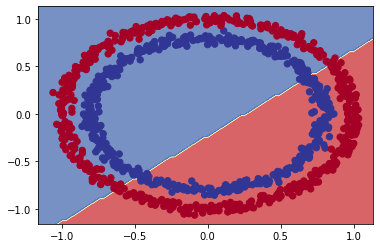

In [62]:
# check out the predictions our model is making
plot_decision_boundary(model= model_3,
                       X=X,
                       y=y)

# The missing piece: Non-linearity

In [63]:
# set the random seed
tf.random.set_seed(42)

# Create the model 

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

model_4.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

doing binary classification


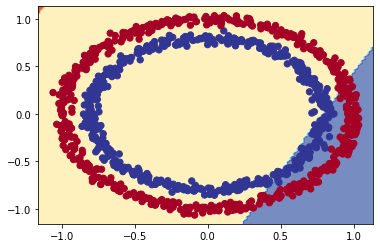

In [64]:
# plot decision boundary
plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

In [65]:
# set the random seed
tf.random.set_seed(42)

# Create the model 

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history1 = model_6.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/200
32/32 [==============================] - 0s 975us/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/200
32/32 [==============================] - 0s 965us/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch

In [66]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 954us/step - loss: 0.0690 - accuracy: 0.9930


[0.06901048123836517, 0.9929999709129333]

doing binary classification


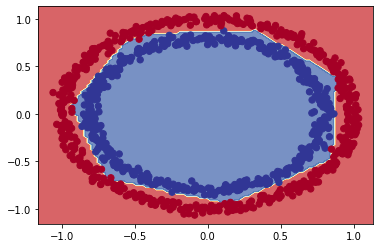

In [67]:
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

In [68]:
# Toy Tensor
A= tf.cast(tf.range(-10,10), dtype= 'float32')
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

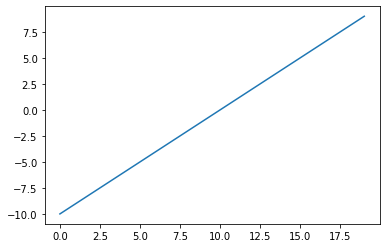

In [69]:
plt.plot(A)

In [70]:
def sigmoid(x):
    return 1 / (1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

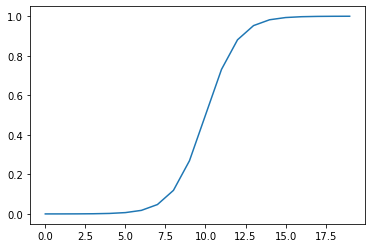

In [71]:
plt.plot(sigmoid(A))

In [72]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

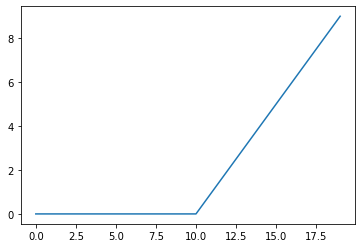

In [73]:
plt.plot(relu(A))

# Evaluating and improving our classification

In [74]:
len(X)

1000

In [75]:
# Split into train and test set
X_train, y_train = X[:800], y[: 800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [76]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.01),
                metrics = ['accuracy'])
history= model_8.fit(X_train, y_train, epochs = 25, verbose= 2)

Epoch 1/25
25/25 - 0s - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 - 0s - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 - 0s - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 - 0s - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 - 0s - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 - 0s - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 - 0s - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 - 0s - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 - 0s - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 - 0s - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 - 0s - loss: 0.5404 - accuracy: 0.7650
Epoch 12/25
25/25 - 0s - loss: 0.5015 - accuracy: 0.7837
Epoch 13/25
25/25 - 0s - loss: 0.4683 - accuracy: 0.7975
Epoch 14/25
25/25 - 0s - loss: 0.4113 - accuracy: 0.8450
Epoch 15/25
25/25 - 0s - loss: 0.3625 - accuracy: 0.9125
Epoch 16/25
25/25 - 0s - loss: 0.3209 - accuracy: 0.9312
Epoch 17/25
25/25 - 0s - loss: 0.2847 - accuracy: 0.9488
Epoch 18/25
25/25 - 0s - loss: 0.2597 - 

In [77]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


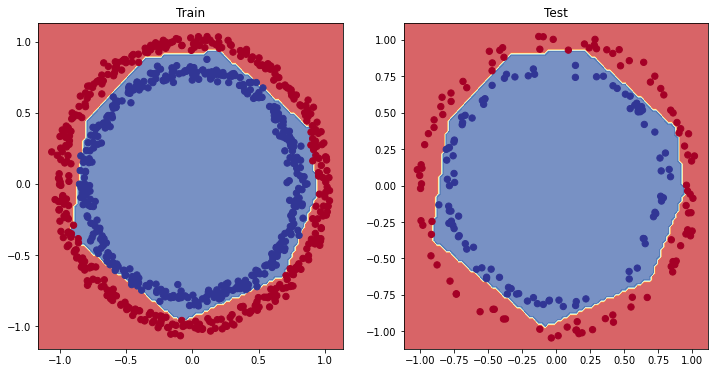

In [78]:
# plot the decision boundaries for the train and the test data sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

In [79]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


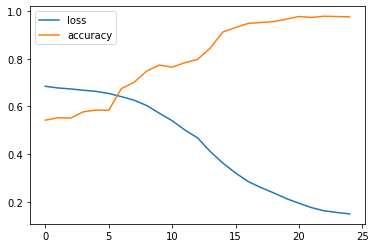

In [80]:
pd.DataFrame(history.history).plot()
plt.show()

## Finding the best learning rate... we're going to use the follwing steps

* A learning rate **callback**
* Another model
* Modifies Loss curve plot

In [81]:
tf.random.set_seed(42)

model_9 =tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation ='relu'),
                              tf.keras.layers.Dense(4, activation ='relu'),
                              tf.keras.layers.Dense(1, activation ='sigmoid'),
])

model_9.compile(loss= 'binary_crossentropy',
                optimizer= 'Adam',
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

history_9 = model_9.fit(X_train,
                      y_train,
                      epochs= 100,
                      callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

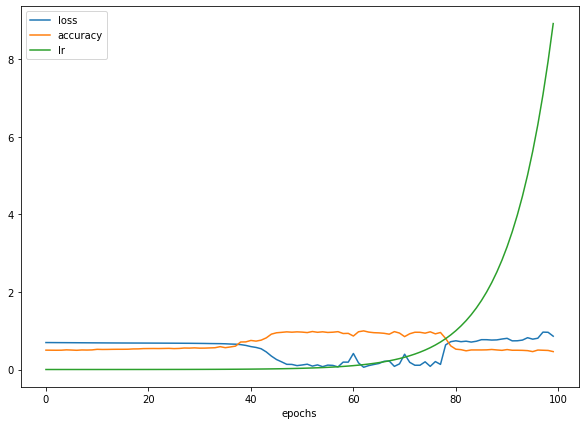

In [82]:
# chekout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs');

Text(0.5, 1.0, 'lrs vs loss')

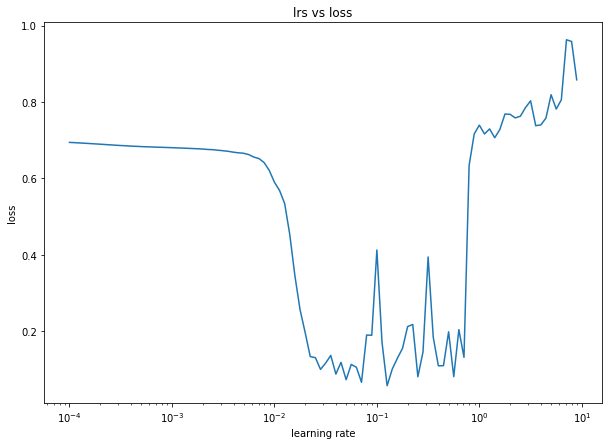

In [83]:
# plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize= (10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('lrs vs loss')

In [84]:
lrs = 1e-4 * (10**(tf.range(100)/20))
print(tf.range(100)/20)
print(lrs)
(10**(tf.range(100)/20))

tf.Tensor(
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95], shape=(100,), dtype=float64)
tf.Tensor(
[1.00000000e-04 1.12201845e-04 1.25892541e-04 1.41253754e-04
 1.58489319e-04 1.77827941e-04 1.99526231e-04 2.23872114e-04
 2.51188643e-04 2.81838293e-04 3.16227766e-04 3.54813389e-04
 3.98107171e-04 4.46683592e-04 5.01187234e-04 5.62341325e-04
 6.30957344e-04 7.07945784e-04 7.94328235e-04 8.91250938e-04
 1.00000000e-03 1.12201845e-03 1.25892541e-03 1.41253754e-03
 1.58489319e-03 1.77827941e-03 1.99526231e-03 2.23872114e-03
 2.51188643e

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e+00, 1.12201845e+00, 1.25892541e+00, 1.41253754e+00,
       1.58489319e+00, 1.77827941e+00, 1.99526231e+00, 2.23872114e+00,
       2.51188643e+00, 2.81838293e+00, 3.16227766e+00, 3.54813389e+00,
       3.98107171e+00, 4.46683592e+00, 5.01187234e+00, 5.62341325e+00,
       6.30957344e+00, 7.07945784e+00, 7.94328235e+00, 8.91250938e+00,
       1.00000000e+01, 1.12201845e+01, 1.25892541e+01, 1.41253754e+01,
       1.58489319e+01, 1.77827941e+01, 1.99526231e+01, 2.23872114e+01,
       2.51188643e+01, 2.81838293e+01, 3.16227766e+01, 3.54813389e+01,
       3.98107171e+01, 4.46683592e+01, 5.01187234e+01, 5.62341325e+01,
       6.30957344e+01, 7.07945784e+01, 7.94328235e+01, 8.91250938e+01,
       1.00000000e+02, 1.12201845e+02, 1.25892541e+02, 1.41253754e+02,
       1.58489319e+02, 1.77827941e+02, 1.99526231e+02, 2.23872114e+02,
       2.51188643e+02, 2.81838293e+02, 3.16227766e+02, 3.54813389e+02,
       3.98107171e+02, 4.4668

In [85]:
# lets try a higher learning rate with the same model as above
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                 metrics= ['accuracy'])

history_10 = model_10.fit(X_train, y_train, epochs= 20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 960us/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 976us/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 997us/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
2

In [86]:
# evaluate model 10 on the test dataset
model_10.evaluate( X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

In [87]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


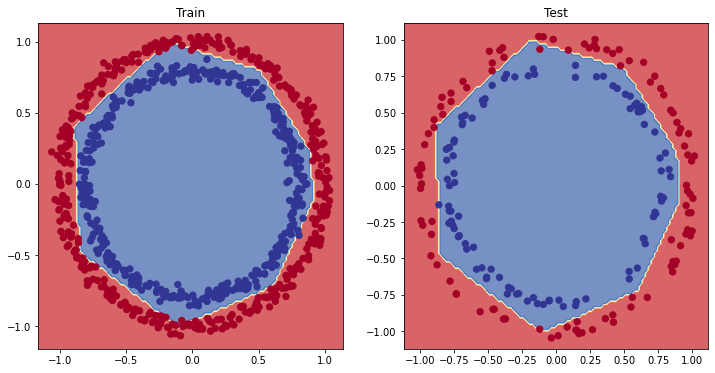

In [88]:
# plot the decision boundaries for training and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## Mpore classification evaluation models
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [90]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {accuracy*100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set : 0.05740181356668472
Model accuracy on the test set : 99.00%


In [92]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test , y_preds)

ValueError: ignored

In [94]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[9.8526537e-01],
        [9.9923790e-01],
        [9.9032342e-01],
        [9.9706948e-01],
        [3.9622882e-01],
        [1.8126875e-02],
        [9.6829069e-01],
        [1.9746691e-02],
        [9.9967170e-01],
        [5.6460500e-04]], dtype=float32))

In [96]:
y_pred = list()
for y in y_preds:
    if y>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[1, 1, 1, 1, 0, 0, 1, 0, 1, 0]

In [99]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

y_pred = list()
for y in y_preds:
    if y>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

confusion_matrix(y_test , y_pred)


array([[99,  2],
       [ 0, 99]])

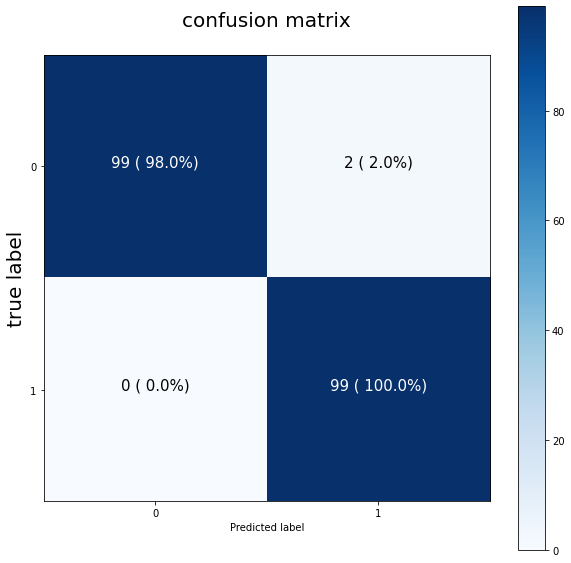

In [111]:
### Prettifying our confusion matrix
import itertools

figsize = (10,10)

cm= confusion_matrix(y_test, y_pred )

cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# lets prettify it
fig, ax = plt.subplots(figsize = figsize)

csx = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(csx)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
# label the axis
ax.set(title= 'confusion matrix',
       xlabel= 'Predicted label',
       ylabel= 'true label',
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels)

#set x-axis labels to bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size 
ax.yaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100: .1f}%)',
    horizontalalignment= 'center',
    color='white' if cm[i,j]>threshold else "black",
    size=15)

## Working with a larger example (multiclass classification)

In [112]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [114]:
# show the first training sample
print(f'training Features {train_data[0]}')
print(f'training labels {train_labels[0]}')

training Features [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [116]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

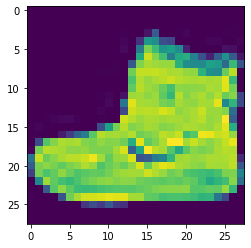

In [117]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [118]:
# Check out sample label
train_labels[0]

9

In [119]:
# Create a small list so we can indes onto ou training labels to make it human understandable
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Dress')

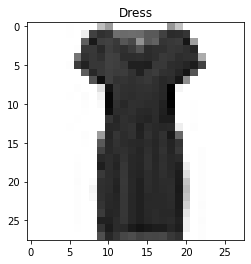

In [120]:
# plot an example image and its label
index_of_choice=20
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

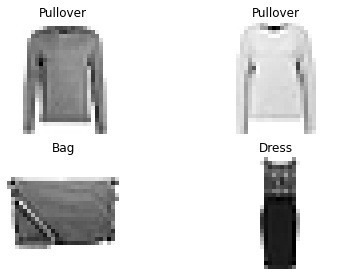

In [121]:
# plot multiple random images of fashion mnist

import random 
plt.figure(figsize= (7,7))
for i in range(4):
    ax = plt.subplot(3,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False) 

# Building a multiclass classification model
* input_shape= 28*28
* output_shape= 10 (one per class)
* loss function = tf.keras.CategoricalCrossentropy()
* Output layer activation= Softmax(not sigmoid)

SparceCategoricalCrossentropy is used when labels are not one hot encoded

In [125]:
tf.random.set_seed(42)

model_11= tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

model_11.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs= 10,
                                validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [126]:
model_11.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [127]:
 # check the min and max values of the train data
 train_data.min(), train_data.max()

(0, 255)

In [128]:
# we can get our training and test data within 0 and 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [129]:
tf.random.set_seed(42)

model_12= tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

model_12.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs= 10,
                                validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

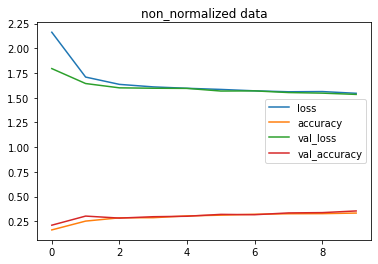

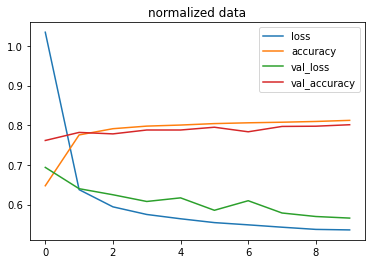

In [130]:
import pandas as pd
# plot non_normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='non_normalized data')

# plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='normalized data')

#Finding the ideal learning rate

In [131]:
tf.random.set_seed(42)

model_13= tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

model_13.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs= 40,
                               validation_data= (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'finding the ideal learning rate')

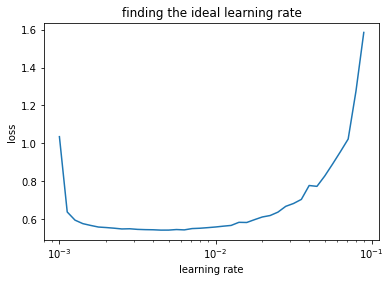

In [132]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss') 
plt.title('finding the ideal learning rate')            

In [135]:
tf.random.set_seed(42)

model_13= tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(4, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

model_13.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr= 0.0011),
                 metrics = ['accuracy'])


find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs= 40,
                               validation_data= (test_data_norm, test_labels))


Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4166 - accuracy: 0.5081 - val_loss: 0.6831 - val_accuracy: 0.7631
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6414 - accuracy: 0.7738 - val_loss: 0.6389 - val_accuracy: 0.7822
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5950 - accuracy: 0.7917 - val_loss: 0.6237 - val_accuracy: 0.7786
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5734 - accuracy: 0.8006 - val_loss: 0.6092 - val_accuracy: 0.7885
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5588 - accuracy: 0.8027 - val_loss: 0.6169 - val_accuracy: 0.7886
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5536 - accuracy: 0.8049 - val_loss: 0.5857 - val_accuracy: 0.7934
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5441 - accuracy: 0.8078 - val_loss: 0.6058 - val_accuracy:

### Evaluating our multiclass model

* use confusion matrix
* asses some of its predictions using viz
* save and export it for use in application 

In [137]:
### Prettifying our confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size= 15):

    cm= confusion_matrix(y_true, y_pred )

    cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # lets prettify it
    fig, ax = plt.subplots(figsize = figsize)
    # create a matrix plot
    csx = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(csx)

    classes = False
    # set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    # label the axis
    ax.set(title= 'confusion matrix',
        xlabel= 'Predicted label',
        ylabel= 'true label',
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels)

    #set x-axis labels to bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size 
    ax.yaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    #Set threshold for different colors
    threshold = (cm.max() + cm.min())/2

    # plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100: .1f}%)',
        horizontalalignment= 'center',
        color='white' if cm[i,j]>threshold else "black",
        size=15)

In [138]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [141]:
# make some predictions with our model
y_probs = model_13.predict(test_data_norm)

y_probs[:5]

array([[3.89368898e-10, 4.62623440e-10, 1.35936034e-05, 1.36031031e-06,
        2.09448190e-05, 3.66025537e-01, 5.71656642e-08, 3.95981297e-02,
        3.05527868e-03, 5.91285110e-01],
       [1.07931310e-05, 1.87470427e-16, 8.99805605e-01, 1.11303962e-06,
        3.29803526e-02, 1.52608933e-17, 6.67055622e-02, 0.00000000e+00,
        4.96663502e-04, 4.36064080e-19],
       [9.01051826e-05, 9.98030007e-01, 2.36219904e-07, 1.84644538e-03,
        1.95711636e-05, 4.07972813e-20, 1.34237689e-05, 3.19763387e-15,
        8.25384916e-08, 8.11844092e-10],
       [2.99446256e-05, 9.97770786e-01, 7.03593741e-07, 2.02939007e-03,
        1.47550556e-04, 3.22568344e-18, 2.11391198e-05, 5.39884381e-13,
        2.51534317e-07, 2.59278664e-07],
       [1.29499480e-01, 2.30013643e-06, 1.20090455e-01, 1.07067376e-02,
        3.78851034e-02, 1.33795192e-18, 7.01435864e-01, 7.56217672e-30,
        3.80160636e-04, 6.39249677e-16]], dtype=float32)

In [144]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.8936890e-10, 4.6262344e-10, 1.3593603e-05, 1.3603103e-06,
        2.0944819e-05, 3.6602554e-01, 5.7165664e-08, 3.9598130e-02,
        3.0552787e-03, 5.9128511e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [145]:
# convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [147]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

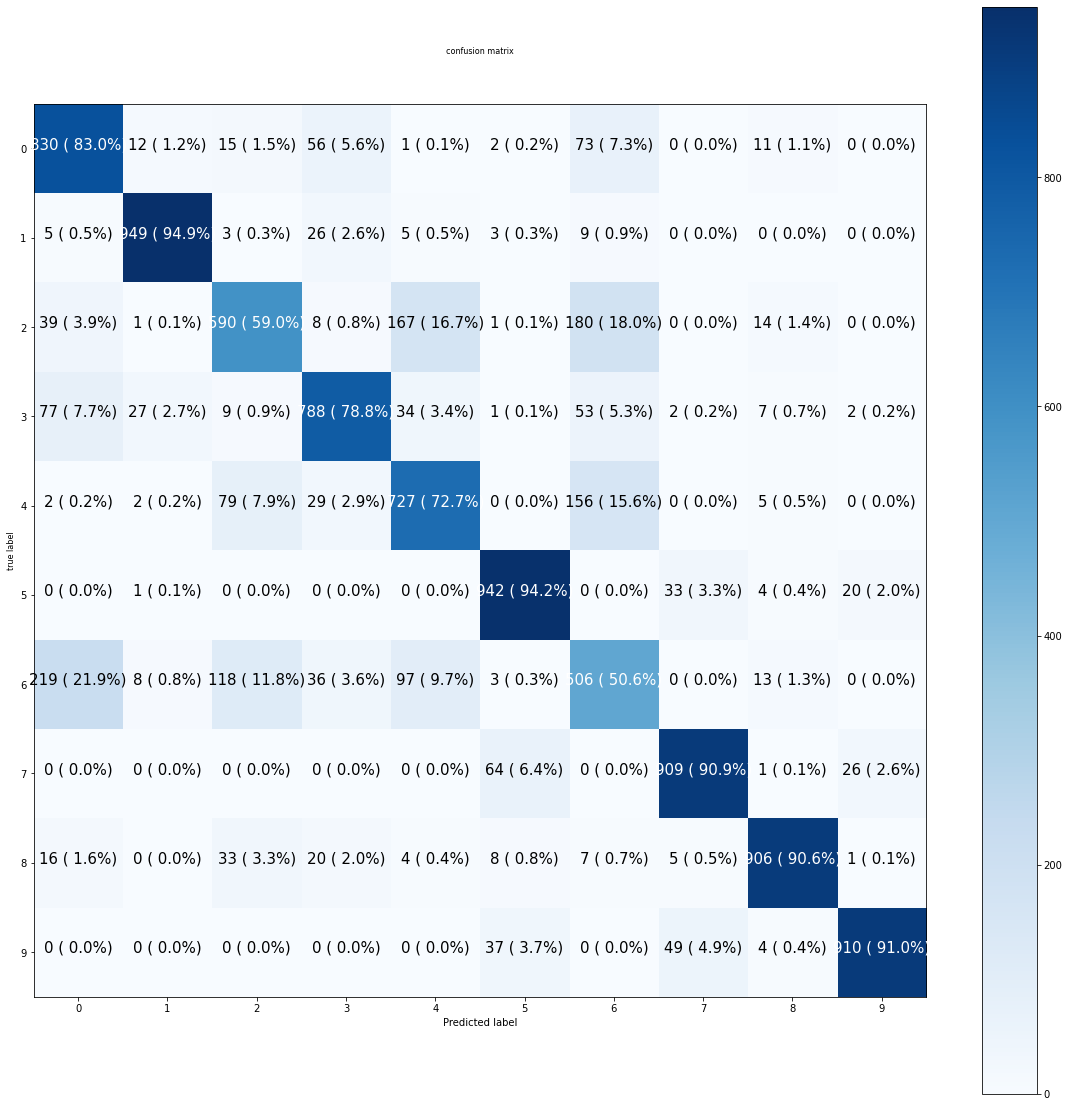

In [153]:
#make a pretty confusion matrix
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(20,20), text_size= 8)

In [160]:
# plotting a random number
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label
    """
    i = random.randint(0, len(images))
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label= classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # plot the image
    plt.imshow(target_image, cmap= plt.cm.binary)

    # change the color of the titles depending on if the prediction is right or wrong
    if pred_label ==true_label:
        color= 'green'
    else:
        color= 'red'

    # Add xlabel information (prediction/ true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color= color)

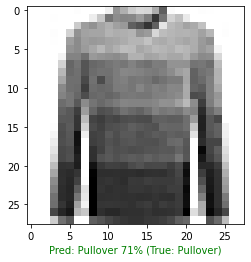

In [173]:
# check out a random image as well as its prediction
plot_random_image(model_13,
                  test_data_norm,
                  test_labels,
                  class_names)

# What patterns is our model learning?

In [175]:
# Find the layers of our most recent model
model_13.layers

In [177]:
# extract a particular layer
model_13.layers[1]

In [179]:
weights, biases= model_13.layers[1].get_weights()
# shapes
weights.shape , biases.shape

((784, 4), (4,))

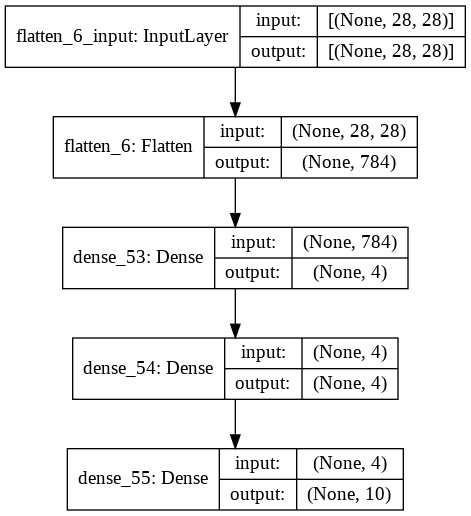

In [181]:
from tensorflow.keras.utils import plot_model

plot_model(model_13, show_shapes= True)